In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
csv_file = 'features_3_sec.csv'

In [95]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [96]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [97]:
X = df.drop(columns=['label', 'filename'], errors='ignore').values
y = df['label'].values 

In [98]:
print("Feature types:", X.dtype)

Feature types: float64


In [99]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
X_test, y_test

(array([[ 6.61490000e+04,  4.04232472e-01,  9.68843102e-02, ...,
          3.12334843e+01, -2.93452954e+00,  3.41663322e+01],
        [ 6.61490000e+04,  2.43588567e-01,  8.43039304e-02, ...,
          5.36618385e+01, -1.11090193e+01,  1.27439947e+01],
        [ 6.61490000e+04,  3.55096906e-01,  8.64653066e-02, ...,
          4.76203995e+01, -3.13186502e+00,  3.44805641e+01],
        ...,
        [ 6.61490000e+04,  4.47399676e-01,  8.74349847e-02, ...,
          6.20268822e+01, -5.95554209e+00,  5.40902710e+01],
        [ 6.61490000e+04,  5.08312345e-01,  7.83877671e-02, ...,
          3.40657387e+01,  1.76879251e+00,  6.08019524e+01],
        [ 6.61490000e+04,  4.10257190e-01,  9.93262231e-02, ...,
          2.96641808e+01, -7.43082142e+00,  4.03510742e+01]]),
 array([4, 5, 0, ..., 4, 3, 8]))

In [102]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [103]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [104]:
y_pred_train[0], y_train[0]

(5, 5)

In [105]:
y_pred_test[0], y_test[0]

(4, 4)

In [106]:
accuracy_training = accuracy_score(y_train, y_pred_train)
accuracy = accuracy_score(y_test, y_pred)

In [108]:
# Training Accuracy
print(f"Training Accuracy: {accuracy_training * 100:.2f}%")
# Testing Accuracy
print(f"Testing Accuracy: {accuracy * 104:.2f}%")

Training Accuracy: 99.92%
Testing Accuracy: 91.66%


In [109]:
y_pred = model.predict(X_test)

In [110]:
cm = confusion_matrix(y_test, y_pred)

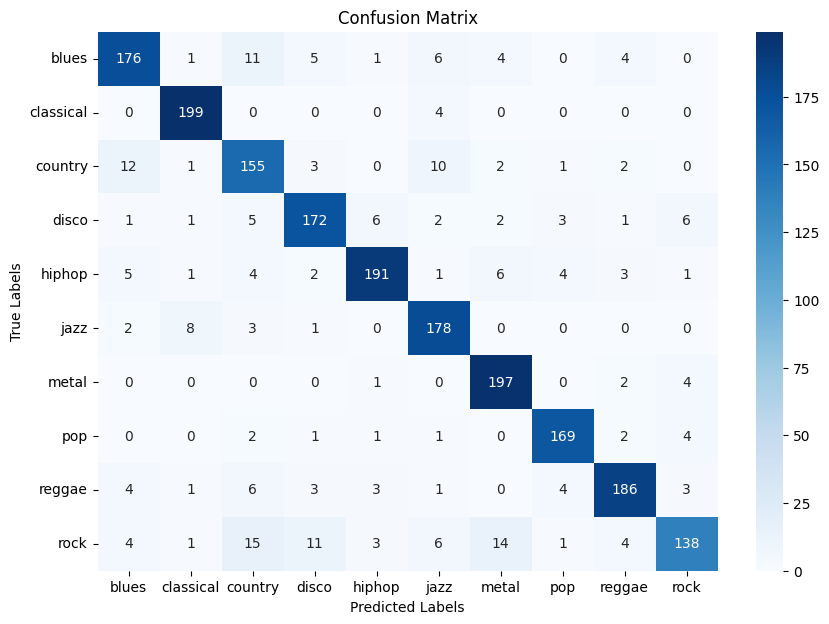

In [111]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()